In [1]:
import pandas as pd 
df = pd.read_csv("data_farmasi_kadarluasa.csv")
df2 = df.copy
df = df[['Produksi (Jumlah) Farmasi Kadarluasa']]
df

,Produksi (Jumlah) Farmasi Kadarluasa
0,2900
1,3200
2,109
3,26
4,5200
...,...
60,25
61,26
62,5
63,49


<AxesSubplot:>

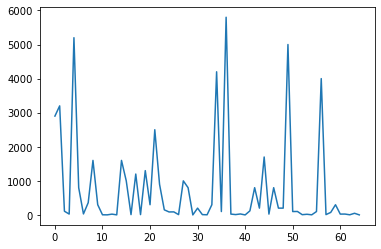

In [2]:
df['Produksi (Jumlah) Farmasi Kadarluasa'].plot()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 1 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Produksi (Jumlah) Farmasi Kadarluasa  65 non-null     int64
dtypes: int64(1)
memory usage: 648.0 bytes


<AxesSubplot:>

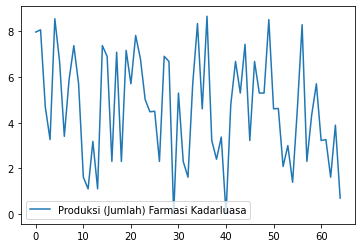

In [4]:
import numpy as np
df = np.log(df) # don't forget to transform the data back when making real predictions

df.plot()

In [5]:
msk = (df.index < len(df)/3*2)
df_train = df[msk].copy()
df_test = df[~msk].copy()
print(len(df_train))
print(len(df_test))

44
21


c:\Users\ALMUNAWWAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


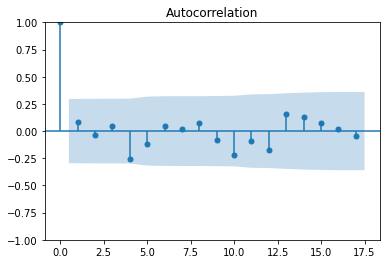

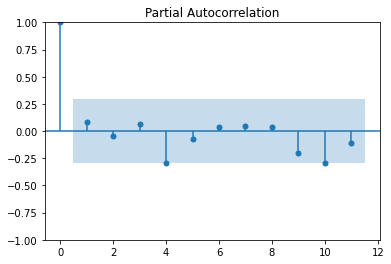

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train,lags=11)

In [7]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.003261081369297039


<AxesSubplot:>

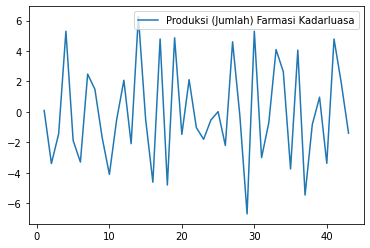

In [8]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

c:\Users\ALMUNAWWAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


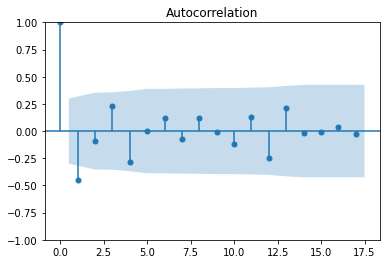

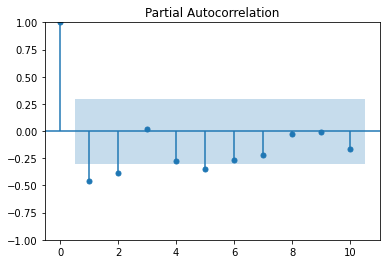

In [9]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff,lags=10)

In [10]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.00014239560988646088


In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                        SARIMAX Results                                         
Dep. Variable:     Produksi (Jumlah) Farmasi Kadarluasa   No. Observations:                   44
Model:                                   ARIMA(1, 1, 1)   Log Likelihood                -101.319
Date:                                  Sat, 18 May 2024   AIC                            208.637
Time:                                          00:35:08   BIC                            213.921
Sample:                                               0   HQIC                           210.586
                                                   - 44                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1065      0.192      0.554      0.580      -0.270

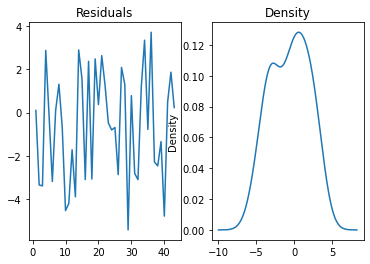

In [12]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\ALMUNAWWAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


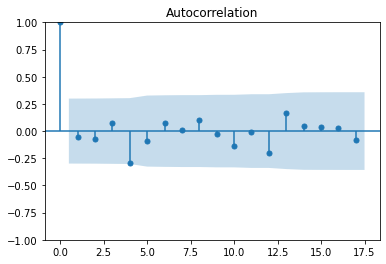

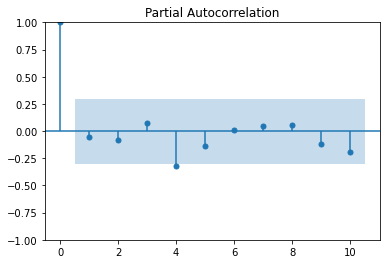

In [13]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals,lags=10)

<AxesSubplot:>

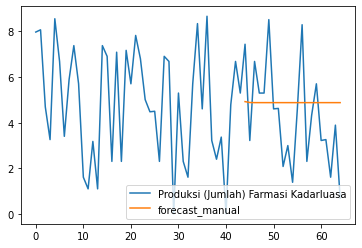

In [14]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [15]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -107.579
Date:                Sat, 18 May 2024   AIC                            223.158
Time:                        00:35:11   BIC                            230.294
Sample:                             0   HQIC                           225.804
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3807      0.156      2.439      0.015       0.075       0.687
ar.L2          0.2228      0.148      1.502      0.133      -0.068       0.513
ar.L3          0.3376      0.168      2.006      0.045       0.008       0.668
sigma2         7.4375      2.231      3.334      0.001       3.065      11.810
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.93
Prob(Q):                              0.92   Prob(JB):                         0.38
Heteroskedasticity (H):               1.12   Skew:                             0.05
Prob(H) (two-sided):                  0.83   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

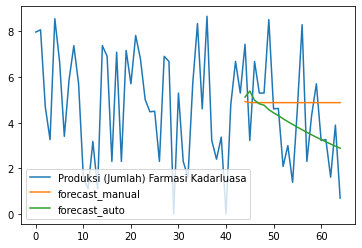

In [17]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 1.8350581657847915
mape - manual: 0.8342341317662145
rmse - manual: 2.221017819875278


In [19]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 1.5181644822141585
mape - auto: 0.5436778601355602
rmse - auto: 1.9340579113222807
